<a href="https://colab.research.google.com/github/tathi-martins/Analise-de-atratividade-para-investimento-em-cl-nica-de-ressonancia-magnetica/blob/main/An%C3%A1lise_de_atratividade_para_investimento_em_cl%C3%ADnica_de_resson%C3%A2ncia_magn%C3%A9tica_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de atratividade para investimento em clínica de ressonância magnética**
## Inclui: simulação de dados, cálculos de indicadores e ranking com 3 cenários de pesos

### **Aluna:** Tathiana de souza Martins - tsm2@cesar.school

## Biblioteca

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1) Dados

## Dados Pessoas com Planos de Saúde

In [4]:
# Dados Pessoas com Planos de Saúde
planos_saude = pd.read_csv('/content/drive/Shareddrives/Projeto - Inteligência de Mercado com Dados/Dados/porcentagem_pessoas_com_plano_saude.csv', encoding='latin-1')
planos_saude.head()

,capital,porc_pessoas_com_ps,informacoes_estatisticas,IC_inferior,IC_superior,ano
0,Porto Alegre,47.8,IC=(42.8-52.8) CV=5.4%,42.8,52.8,2013
1,Vitória,54.9,IC=(48.0-61.9) CV=6.4%,48.0,61.9,2013
2,Recife,41.3,IC=(34.8-47.8) CV=8.0%,34.8,47.8,2013
3,Recife,40.4,"IC=(33.40-47.40) CV=8,84%",33.4,47.4,2019
4,Vitória,55.7,"IC=(48.70-62.60) CV=6,37%",48.7,62.6,2019


In [5]:
# Converter ano para string
planos_saude_copy = planos_saude.copy(deep=True)
planos_saude_copy['ano'] = planos_saude_copy['ano'].astype(str)

# Criar gráfico com eixo X categórico
fig = px.bar(
    planos_saude_copy,
    x='ano',
    y='porc_pessoas_com_ps',
    color='capital',
    hover_data=['IC_inferior', 'IC_superior'],
    labels={'porc_pessoas_com_ps': 'Pessoas com Planos de Saúde (%)'},
    height=400,
    barmode='group'
)

fig.update_layout(
    title="Porcentagem de Pessoas com Planos de Saúde nos anos 2013 e 2019 (PNAD)",
    title_x=0.5  # centralizar título
    )

fig.show()

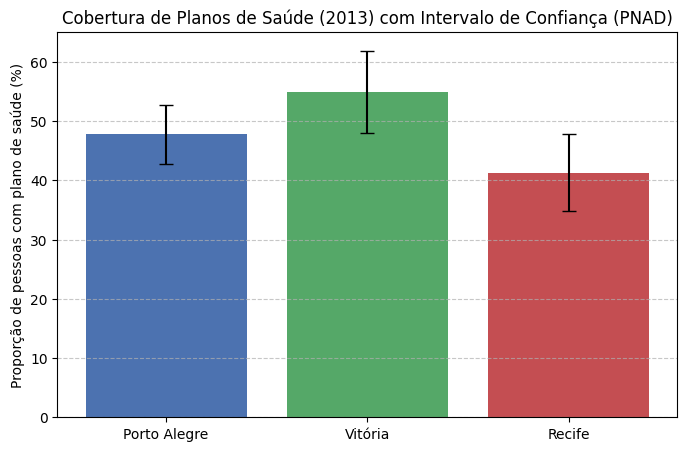

In [6]:
# Filtra os dados do ano 2013
planos_saude_2013 = planos_saude[planos_saude['ano'] == 2013].copy()

# Calcula os erros
yerr_values = [planos_saude_2013['porc_pessoas_com_ps'] - planos_saude_2013['IC_inferior'],
               planos_saude_2013['IC_superior'] - planos_saude_2013['porc_pessoas_com_ps']]

# Gráfico
plt.figure(figsize=(8,5))
plt.bar(planos_saude_2013["capital"], planos_saude_2013["porc_pessoas_com_ps"],
        yerr=yerr_values, capsize=5, color=["#4c72b0", "#55a868", "#c44e52"])
plt.ylabel("Proporção de pessoas com plano de saúde (%)")
plt.title("Cobertura de Planos de Saúde (2013) com Intervalo de Confiança (PNAD)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

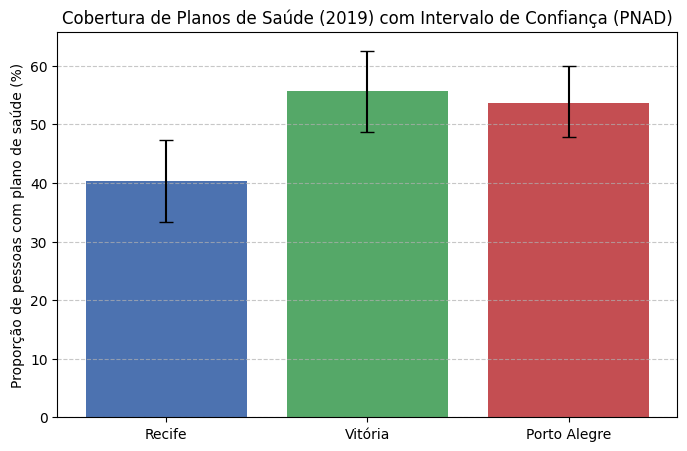

In [7]:
# Filtra os dados do ano 2019
planos_saude_2019 = planos_saude[planos_saude['ano'] == 2019].copy()

# Calcula os erros
yerr_values = [planos_saude_2019['porc_pessoas_com_ps'] - planos_saude_2019['IC_inferior'],
               planos_saude_2019['IC_superior'] - planos_saude_2019['porc_pessoas_com_ps']]

# Gráfico
plt.figure(figsize=(8,5))
plt.bar(planos_saude_2019["capital"], planos_saude_2019["porc_pessoas_com_ps"],
        yerr=yerr_values, capsize=5, color=["#4c72b0", "#55a868", "#c44e52"])
plt.ylabel("Proporção de pessoas com plano de saúde (%)")
plt.title("Cobertura de Planos de Saúde (2019) com Intervalo de Confiança (PNAD)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Dados População

In [8]:
# Dados População
populacao = pd.read_csv('/content/drive/Shareddrives/Projeto - Inteligência de Mercado com Dados/Dados/ibge_populacao_estimada.csv', encoding='latin-1')
populacao.head(10)

,capital,populacao,ano
0,Recife,1588393,2014
1,Recife,1591183,2015
2,Recife,1592617,2016
3,Recife,1593191,2017
4,Recife,1594714,2018
5,Recife,1596847,2019
6,Vitória,338886,2014
7,Vitória,338886,2015
8,Vitória,341317,2016
9,Vitória,342078,2017


In [9]:
# Gráfico base
fig = px.line(
    populacao,
    x="ano",
    y="populacao",
    color="capital",
    labels={"populacao": "População", "ano": "Ano"} # rótulos
)

fig.update_traces(mode="lines+markers")

# Layout clean
fig.update_layout(
    title="População Estimada (IBGE)",
    title_x=0.5,  # centralizar título
    plot_bgcolor="white",
    xaxis=dict(showgrid=False, linecolor="black", zeroline=False),
    yaxis=dict(showgrid=False, linecolor="black", zeroline=False, showticklabels=False, showline=False),
    legend=dict(visible=False)
)

# Adicionar valores iniciais e finais + nome da cidade
for capital in populacao["capital"].unique():
    df_cap = populacao[populacao["capital"] == capital].sort_values("ano")

    # Valor inicial
    valor_inicio = df_cap.iloc[0]["populacao"]
    fig.add_annotation(
        x=df_cap.iloc[0]["ano"], y=valor_inicio,
        text=f"{valor_inicio:,}".replace(",", "."),
        showarrow=False,
        xanchor="right", font=dict(size=14, color="black")
    )

    # Valor final + nome da cidade
    valor_fim = df_cap.iloc[-1]["populacao"]
    ano_fim = df_cap.iloc[-1]["ano"]
    fig.add_annotation(
        x=ano_fim, y=valor_fim,
        text=f"{valor_fim:,}  {capital}".replace(",", "."),
        showarrow=False,
        xanchor="left", font=dict(size=14, color="black")
    )

fig.show()


## Dados Equipamentos

In [10]:
# A) Dados Equipamentos
equipamentos = pd.read_csv('/content/drive/Shareddrives/Projeto - Inteligência de Mercado com Dados/Dados/num_ressonancia_magnetica_3mun.csv', encoding='latin-1')
equipamentos.head()

,capital,num_ressonancia_magnetica,periodo
0,RECIFE,24,Jan/2014
1,RECIFE,23,Jan/2015
2,VITORIA,12,Jan/2014
3,VITORIA,13,Jan/2015
4,PORTO ALEGRE,14,Jan/2014


In [11]:
# Gráfico base
fig = px.line(
    equipamentos,
    x="periodo",
    y="num_ressonancia_magnetica",
    color="capital",
    labels={"num_ressonancia_magnetica": "Número de Equipamentos", "periodo": "Periodo"} # rótulos
)

fig.update_traces(mode="lines+markers")

# Layout clean
fig.update_layout(
    title="Número de Equipamentos Existentes na Rede Privada (DATASUS)",
    title_x=0.5,  # centralizar título
    plot_bgcolor="white",
    xaxis=dict(showgrid=False, linecolor="black", zeroline=False),
    yaxis=dict(showgrid=False, linecolor="black", zeroline=False, showticklabels=False, showline=False),
    legend=dict(visible=False)
)

# Adicionar valores iniciais e finais + nome da cidade
for capital in equipamentos["capital"].unique():
    df_cap = equipamentos[equipamentos["capital"] == capital].sort_values("periodo")

    # Valor inicial
    valor_inicio = df_cap.iloc[0]["num_ressonancia_magnetica"]
    fig.add_annotation(
        x=df_cap.iloc[0]["periodo"], y=valor_inicio,
        text=f"{valor_inicio:,}".replace(",", "."),
        showarrow=False,
        xanchor="right", font=dict(size=14, color="black")
    )

    # Valor final + nome da cidade
    valor_fim = df_cap.iloc[-1]["num_ressonancia_magnetica"]
    ano_fim = df_cap.iloc[-1]["periodo"]
    fig.add_annotation(
        x=ano_fim, y=valor_fim,
        text=f"{valor_fim:,}  {capital}".replace(",", "."),
        showarrow=False,
        xanchor="left", font=dict(size=14, color="black")
    )

fig.show()


## Dados Equipamentos Ativos

In [12]:
# Dados Equipamentos Ativos
equipamentos_ativos = pd.read_csv('/content/drive/Shareddrives/Projeto - Inteligência de Mercado com Dados/Dados/ressonancia_magnetica_ativos.csv', encoding='latin-1', sep=';')
equipamentos_ativos.head()

,ano_mes,recife,vitoria,porto_alegre,total
0,2014/Jan,30,14,26,70
1,2014/Fev,30,14,26,70
2,2014/Mar,30,14,26,70
3,2014/Abr,29,14,26,69
4,2014/Mai,29,14,26,69


In [13]:
capitais = ["recife",   "vitoria",      "porto_alegre"]

# Reformata o dataframe para um formato longo para facilitar a visualização
equip_long_ativos = equipamentos_ativos.melt(
    id_vars='ano_mes',
    value_vars=capitais,
    var_name='capital',
    value_name='num_equipamentos_ativos'
)

# Gráfico base
fig = px.line(
    equip_long_ativos,
    x="ano_mes",
    y="num_equipamentos_ativos",
    color="capital",
    labels={"num_equipamentos_ativos": "Número de Equipamentos Ativos", "ano_mes": "Periodo"} # rótulos
)

fig.update_traces(mode="lines+markers")

# Layout clean
fig.update_layout(
    title="Número de Equipamentos Ativos na Rede Privada (DATASUS)",
    title_x=0.5,  # centralizar título
    plot_bgcolor="white",
    xaxis=dict(showgrid=False, linecolor="black", zeroline=False),
    yaxis=dict(showgrid=False, linecolor="black", zeroline=False, showticklabels=False, showline=False),
    legend=dict(visible=False)
)

# Adiciona valor inicial e final + nome da cidade
for capital in equip_long_ativos["capital"].unique():
    df_cap = equip_long_ativos[equip_long_ativos["capital"] == capital].sort_values("ano_mes")

    # Valor inicial
    valor_inicio = df_cap.iloc[0]["num_equipamentos_ativos"]
    fig.add_annotation(
        x=df_cap.iloc[0]["ano_mes"], y=valor_inicio,
        text=f"{valor_inicio:,}".replace(",", "."),
        showarrow=False,
        xanchor="right", font=dict(size=14, color="black")
    )

    # Valor Final + nome da cidade
    valor_fim = df_cap.iloc[-1]["num_equipamentos_ativos"]
    ano_fim = df_cap.iloc[-1]["ano_mes"]
    fig.add_annotation(
        x=ano_fim, y=valor_fim,
        text=f"{valor_fim:,}  {capital}".replace(",", "."),
        showarrow=False,
        xanchor="left", font=dict(size=14, color="black")
    )

fig.show()

## Dados do Trabalho e Desocupação

In [14]:
# Dados Trabalho e Desocupação 4099
desemprego_4099 = pd.read_csv('/content/drive/Shareddrives/Projeto - Inteligência de Mercado com Dados/Dados/taxa_desocupados_tabela4099.csv', encoding='utf-8', sep=';')
desemprego_4099.head(20)

,Região Metropolitana até 2020,1º trimestre 2014,2º trimestre 2014,3º trimestre 2014,4º trimestre 2014,1º trimestre 2015,2º trimestre 2015,3º trimestre 2015,4º trimestre 2015,1º trimestre 2016,...,4º trimestre 2017,1º trimestre 2018,2º trimestre 2018,3º trimestre 2018,4º trimestre 2018,1º trimestre 2019,2º trimestre 2019,3º trimestre 2019,4º trimestre 2019,1º trimestre 2025
0,Manaus (AM),"9,8","10,0","8,0","8,7","10,9","11,5","11,5","10,4","16,0",...,"17,6","17,6","16,8","16,4","17,3","18,5","16,7","16,3","15,8","9,5"
1,Belém (PA),"11,3","11,3","11,9","11,7","13,6","13,1","12,0","12,1","13,9",...,"12,7","14,0","14,4","14,7","12,4","14,4","15,0","15,1","12,7","9,4"
2,Macapá (AP),"11,9","9,9","10,8","9,9","10,3","11,4","13,4","14,0","16,1",...,"17,3","20,5","21,5","17,7","19,7","20,5","18,4","17,5","16,8","7,3"
3,Grande São Luís (MA),"8,9","10,0","9,6","11,0","13,2","13,8","14,2","13,5","17,1",...,"20,0","20,3","16,6","16,3","18,0","20,1","19,7","16,5","14,9","7,3"
4,Fortaleza (CE),"8,3","7,7","7,3","6,6","7,9","8,9","9,8","9,2","11,7",...,"10,7","13,2","12,3","11,6","11,0","12,7","11,8","12,2","10,9","8,2"
5,Natal (RN),"12,1","11,4","11,5","12,4","12,3","13,1","13,9","11,9","14,2",...,"12,3","14,3","13,5","12,1","14,0","13,8","12,8","14,4","11,4","8,1"
6,João Pessoa (PB),"10,3","10,6","10,8","9,0","10,1","12,0","13,0","10,8","10,7",...,"9,6","11,9","11,9","12,5","11,7","11,9","12,7","13,4","13,7","10,4"
7,Recife (PE),"9,6","9,4","9,6","9,2","7,7","7,2","10,2","11,9","13,6",...,"18,8","19,5","18,9","19,1","16,9","17,9","18,1","18,4","15,7","11,6"
8,Maceió (AL),"12,5","12,3","12,3","11,7","12,7","12,4","12,2","10,9","13,8",...,"15,7","17,3","17,4","18,4","16,4","14,7","13,5","13,9","11,3","8,0"
9,Aracaju (SE),"10,3","11,2","10,4","11,8","11,0","11,2","10,6","11,8","13,5",...,"17,3","20,0","18,7","18,8","16,7","16,0","16,2","16,5","16,5","9,6"


#### Filtrando as cidades Recife (PE), Porto Alegre (RS), Grande Vitória (ES)

In [15]:
desempregados_4099_filtered = desemprego_4099[desemprego_4099['Região Metropolitana até 2020'].isin(['Recife (PE)','Porto Alegre (RS)','Grande Vitória (ES)'])]
desempregados_4099_filtered

,Região Metropolitana até 2020,1º trimestre 2014,2º trimestre 2014,3º trimestre 2014,4º trimestre 2014,1º trimestre 2015,2º trimestre 2015,3º trimestre 2015,4º trimestre 2015,1º trimestre 2016,...,4º trimestre 2017,1º trimestre 2018,2º trimestre 2018,3º trimestre 2018,4º trimestre 2018,1º trimestre 2019,2º trimestre 2019,3º trimestre 2019,4º trimestre 2019,1º trimestre 2025
7,Recife (PE),"9,6","9,4","9,6","9,2","7,7","7,2","10,2","11,9","13,6",...,"18,8","19,5","18,9","19,1","16,9","17,9","18,1","18,4","15,7","11,6"
12,Grande Vitória (ES),"8,4","9,5","8,1","8,4","9,5","9,2","11,0","12,4","14,2",...,"13,9","14,9","14,9","13,6","12,3","13,4","12,1","11,8","12,4","3,9"
17,Porto Alegre (RS),"6,0","5,4","6,2","4,8","6,5","6,9","7,5","7,1","8,4",...,"10,3","10,4","10,2","10,2","9,0","8,9","10,2","10,1","8,9","7,1"


# 2) Preparação dos dados

In [16]:
# Padronizar nomes para merge
populacao['capital'] = populacao['capital'].str.strip().str.upper().replace('VITÓRIA', 'VITORIA')

# Também padronizar plano de saúde
planos_saude['capital'] = planos_saude['capital'].str.strip().str.upper().replace('VITÓRIA', 'VITORIA')

# Padronizar equipamentos
equipamentos = equipamentos.rename(columns={'municipio': 'capital'})

# Criar um dicionário para padronizar desempregados
mapa_capitais = {
    "RECIFE (PE)": "RECIFE",
    "GRANDE VITÓRIA (ES)": "VITORIA",
    "PORTO ALEGRE (RS)": "PORTO ALEGRE"
}
# Rename column in desempregados_4099_filtered
desempregados_4099_filtered = desempregados_4099_filtered.rename(columns={'Região Metropolitana até 2020': 'capital'})

desempregados_4099_filtered['capital'] = desempregados_4099_filtered['capital'].str.upper().replace(mapa_capitais)


# 3) Analisando os dados

#### Análise da relação da oferta com a demanda e comparação das regiões.

#### Indicação de qual/quais as regiões com melhor cenário para realizar o investimento.


In [17]:
# 1) Últimos dados de planos de saúde (último ano por capital)
planos_ult = (
    planos_saude
    .sort_values(['capital', 'ano'])
    .groupby('capital', as_index=False)
    .tail(1)
    .rename(columns={'porc_pessoas_com_ps': 'PenetracaoPlanos_%'})
)

# 2) Média de equipamentos de ressonância por capital (2014-2019)
equipamentos_ult = (
    equipamentos
    .groupby('capital', as_index=False)['num_ressonancia_magnetica']
    .mean()
    .rename(columns={'num_ressonancia_magnetica': 'Ressonancias'})
)

# 3) População média (2014-2019)
pop_med = (
    populacao
    .groupby('capital', as_index=False)['populacao']
    .mean()
    .rename(columns={'populacao': 'PopulacaoMedia'})
)

# 4) Média de taxa de desemprego (2014-2019)
colunas_2014_2019 = [c for c in desempregados_4099_filtered.columns if any(ano in c for ano in ['2014','2015','2016','2017','2018','2019'])]
desemprego_media = desempregados_4099_filtered[['capital'] + colunas_2014_2019].copy()
desemprego_media['TaxaDesemprego_%'] = (
    desemprego_media[colunas_2014_2019]
    .apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',','.'), errors='coerce').mean(), axis=1)
)

# 5) Merge geral
base = (
    pop_med
    .merge(planos_ult[['capital','PenetracaoPlanos_%']], on='capital')
    .merge(equipamentos_ult, on='capital')
    .merge(desemprego_media[['capital','TaxaDesemprego_%']], on='capital')
)

# População com plano de saúde
base['PopulacaoComPlano'] = base['PopulacaoMedia'] * (base['PenetracaoPlanos_%'] / 100)

# Equipamentos por 100k habitantes com plano
base['Equip_por_100k'] = base['Ressonancias'] / (base['PopulacaoComPlano'] / 100000)

# 6) Normalização (0 a 1)
for col in ['PenetracaoPlanos_%', 'Equip_por_100k']:
    base[col+'_norm'] = (base[col] - base[col].min()) / (base[col].max() - base[col].min())

# desemprego (quanto menor melhor → invertendo)
base['TaxaDesemprego_%_norm'] = 1 - (base['TaxaDesemprego_%'] - base['TaxaDesemprego_%'].min()) / (base['TaxaDesemprego_%'].max() - base['TaxaDesemprego_%'].min())

# 7) Scores finais (3 cenários)
# Pesos iguais
base['Score_Igual'] = (base['PenetracaoPlanos_%_norm'] + base['Equip_por_100k_norm'] + base['TaxaDesemprego_%_norm']) / 3
# Peso maior para penetração de planos
base['Score_Planos'] = 0.5*base['PenetracaoPlanos_%_norm'] + 0.25*base['Equip_por_100k_norm'] + 0.25*base['TaxaDesemprego_%_norm']
# Peso maior para taxa de desemprego
base['Score_Desemprego'] = 0.5*base['TaxaDesemprego_%_norm'] + 0.25*base['PenetracaoPlanos_%_norm'] + 0.25*base['Equip_por_100k_norm']

# 8) Rankings finais
rankings = base[['capital','Score_Igual','Score_Planos','Score_Desemprego']] \
            .sort_values('Score_Igual', ascending=False)

#print("Ranking final (cenário pesos iguais):")
#print(rankings)


In [18]:
base.head()

,capital,PopulacaoMedia,PenetracaoPlanos_%,Ressonancias,TaxaDesemprego_%,PopulacaoComPlano,Equip_por_100k,PenetracaoPlanos_%_norm,Equip_por_100k_norm,TaxaDesemprego_%_norm,Score_Igual,Score_Planos,Score_Desemprego
0,PORTO ALEGRE,1.442215e+06,53.7,15.0,8.700000,774469.365500,1.936810,0.869281,0.000000,1.000000,0.623094,0.684641,0.717320
1,RECIFE,1.592824e+06,40.4,23.5,14.891667,643500.963333,3.651898,0.000000,0.369582,0.000000,0.123194,0.092396,0.092396
2,VITORIA,3.411922e+05,55.7,12.5,12.725000,190044.036833,6.577423,1.000000,1.000000,0.349933,0.783311,0.837483,0.674966


## Rankings

In [19]:
print("Ranking final (cenário pesos iguais):")
print(rankings)

Ranking final (cenário pesos iguais):
        capital  Score_Igual  Score_Planos  Score_Desemprego
2       VITORIA     0.783311      0.837483          0.674966
0  PORTO ALEGRE     0.623094      0.684641          0.717320
1        RECIFE     0.123194      0.092396          0.092396


## Visualizações

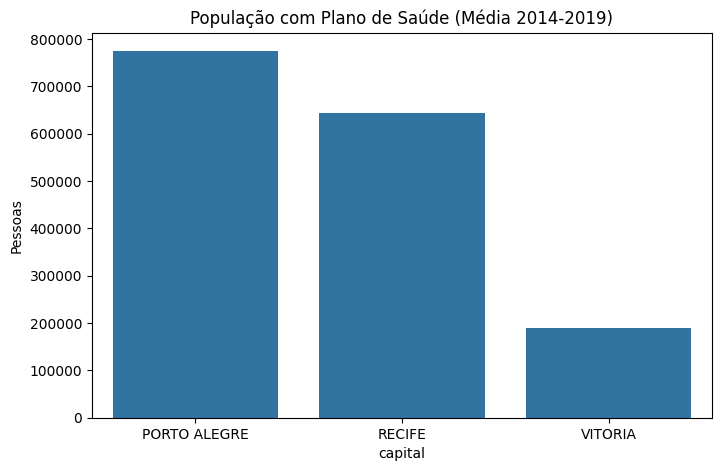

In [20]:
# 4) Visualizações

# Gráfico da população com plano de saúde
plt.figure(figsize=(8,5))
sns.barplot(x="capital", y="PopulacaoComPlano", data=base)
plt.title("População com Plano de Saúde (Média 2014-2019)")
plt.ylabel("Pessoas")
plt.show()

# Gráfico de score com Plotly
fig = px.bar(rankings.melt(id_vars="capital", var_name="Cenario", value_name="Score"),
             x="capital", y="Score", color="Cenario", barmode="group", title="Scores de Atratividade")
fig.show()


# 3b) Usando equipamentos_ativos

In [21]:
equip_long_ativos = (
    equipamentos_ativos
    .melt(id_vars='ano_mes',
          value_vars=['recife','vitoria','porto_alegre'],
          var_name='capital',
          value_name='Ressonancias')
)

# Padronizar nomes de capitais
mapa = {'recife':'RECIFE','vitoria':'VITORIA','porto_alegre':'PORTO ALEGRE'}
equip_long_ativos['capital'] = equip_long_ativos['capital'].map(mapa)

# Média de equipamentos ativos por capital (2014-2019)
equipamentos_ult = (
    equip_long_ativos
    .groupby('capital', as_index=False)['Ressonancias']
    .mean()
)


In [22]:
base_equip_ativos = (
    pop_med
    .merge(planos_ult[['capital','PenetracaoPlanos_%']], on='capital')
    .merge(equipamentos_ult, on='capital')
    .merge(desemprego_media[['capital','TaxaDesemprego_%']], on='capital')
)

# População com plano de saúde
base_equip_ativos['PopulacaoComPlano'] = base_equip_ativos['PopulacaoMedia'] * (base_equip_ativos['PenetracaoPlanos_%'] / 100)

# Equipamentos por 100k habitantes com plano
base_equip_ativos['Equip_por_100k'] = base_equip_ativos['Ressonancias'] / (base_equip_ativos['PopulacaoComPlano'] / 100000)


In [23]:
# Normalização
for col in ['PenetracaoPlanos_%','Equip_por_100k']:
    base_equip_ativos[col+'_norm'] = (base_equip_ativos[col]-base_equip_ativos[col].min())/(base_equip_ativos[col].max()-base_equip_ativos[col].min())
base_equip_ativos['TaxaDesemprego_%_norm'] = 1 - (
    (base_equip_ativos['TaxaDesemprego_%']-base_equip_ativos['TaxaDesemprego_%'].min()) /
    (base_equip_ativos['TaxaDesemprego_%'].max()-base_equip_ativos['TaxaDesemprego_%'].min())
)

# Scores
base_equip_ativos['Score_Igual'] = (base_equip_ativos['PenetracaoPlanos_%_norm'] + base_equip_ativos['Equip_por_100k_norm'] + base_equip_ativos['TaxaDesemprego_%_norm']) / 3
base_equip_ativos['Score_Planos'] = 0.5*base_equip_ativos['PenetracaoPlanos_%_norm'] + 0.25*base_equip_ativos['Equip_por_100k_norm'] + 0.25*base_equip_ativos['TaxaDesemprego_%_norm']
base_equip_ativos['Score_Desemprego'] = 0.5*base_equip_ativos['TaxaDesemprego_%_norm'] + 0.25*base_equip_ativos['PenetracaoPlanos_%_norm'] + 0.25*base_equip_ativos['Equip_por_100k_norm']

rankings_ativos = base_equip_ativos[['capital','Score_Igual','Score_Planos','Score_Desemprego']] \
            .sort_values('Score_Igual', ascending=False)


In [24]:
base_equip_ativos

,capital,PopulacaoMedia,PenetracaoPlanos_%,Ressonancias,TaxaDesemprego_%,PopulacaoComPlano,Equip_por_100k,PenetracaoPlanos_%_norm,Equip_por_100k_norm,TaxaDesemprego_%_norm,Score_Igual,Score_Planos,Score_Desemprego
0,PORTO ALEGRE,1.442215e+06,53.7,30.397260,8.700000,774469.365500,3.924914,0.869281,0.000000,1.000000,0.623094,0.684641,0.717320
1,RECIFE,1.592824e+06,40.4,38.369863,14.891667,643500.963333,5.962674,0.000000,0.513549,0.000000,0.171183,0.128387,0.128387
2,VITORIA,3.411922e+05,55.7,15.000000,12.725000,190044.036833,7.892907,1.000000,1.000000,0.349933,0.783311,0.837483,0.674966


### Rankings

In [25]:
rankings_ativos

,capital,Score_Igual,Score_Planos,Score_Desemprego
2,VITORIA,0.783311,0.837483,0.674966
0,PORTO ALEGRE,0.623094,0.684641,0.717320
1,RECIFE,0.171183,0.128387,0.128387


## Visualizações

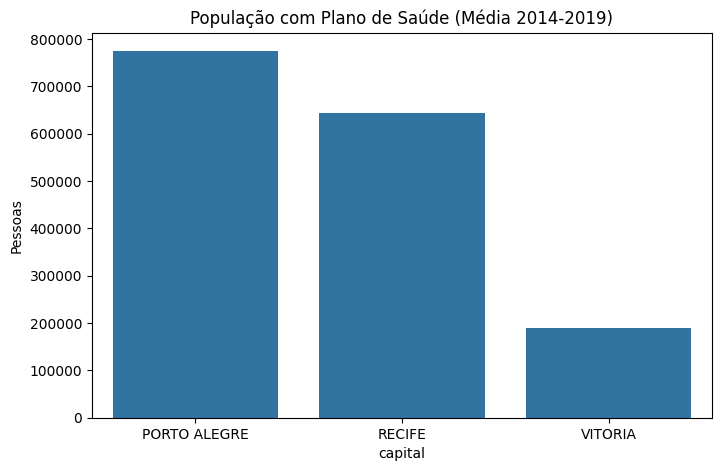

In [26]:
# Gráfico da população com plano de saúde
plt.figure(figsize=(8,5))
sns.barplot(x="capital", y="PopulacaoComPlano", data=base)
plt.title("População com Plano de Saúde (Média 2014-2019)")
plt.ylabel("Pessoas")
plt.show()

# Gráfico de score com Plotly
fig = px.bar(rankings_ativos.melt(id_vars="capital", var_name="Cenario", value_name="Score"),
             x="capital", y="Score", color="Cenario", barmode="group", title="Scores de Atratividade")
fig.show()


# 4) Exportação para Excel e csv

In [27]:
# ==========================
# 5) Exportação para Excel
# ==========================
#base.to_excel("indicadores_clinica.xlsx", index=False)
#print("Arquivo 'indicadores_clinica.xlsx' gerado com sucesso!")

# ==========================
# Para Google Colab
# ==========================
# from google.colab import drive
# drive.mount('/content/drive')
# caminho = '/content/drive/My Drive/indicadores_clinica.xlsx'
# base.to_excel(caminho, index=False)
# print(f"Arquivo salvo em {caminho}")